# <center>**BUILDING A MACHINE LEARNING MODEL TO PREDICT CUSTOMER CHURN IN A COMPANY**

Customer churn occurs when a customer decides to stop using a company's services, content or products. There are many examples and instances of churn:

* Cancellation of a contracted or uncontracted service ;
* Purchase from another competitor's shop;       
* Unsubscribing from a newsletter;       
* Closing a bank account;                    
* Etc.          

In today's business environment, with many competitors, the cost of acquiring new customers is very high. Therefore, the retention of existing customers is more important for its companies. Thus, the company needs to better understand the behaviour of its customers in order to retain them. One way to do this is to create **a Machine Learning model that can predict which customers are likely to unsubscribe**. This allows the company to better target and retain those specific customers who are at higher risk of churn.  

In this project, we will explore a dataset from a telecommunications company and create a model to predict which customers are at higher risk of churn. We will use different machine learning algorithms to compare their performance and then choose the best model.       

Question 1: What are the types of each of the variables? and Which variables have missing values?
Question 2: Is customer churn influenced by gender (the gender variable)? 
Question 3: In your opinion, which variable has the greatest impact on a customer's susceptibility to churn?
Question 4: Which regression model can be used to approach the problem logically?
Question 5: Can we choose a model and test its performance? 


##  Importation of libraries

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV



##  Importation of dataset

In [92]:
df = pd.read_csv('Data_telecom.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Description of the dataset

##### The target variable is the Churn variable which takes two values: Yes (the customer has unsubscribed) and No (the customer has not unsubscribed).

In [93]:
# Description of the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7042 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7041 non-null   object 
 9   OnlineSecurity    7031 non-null   object 
 10  OnlineBackup      7033 non-null   object 
 11  DeviceProtection  7030 non-null   object 
 12  TechSupport       7036 non-null   object 
 13  StreamingTV       7037 non-null   object 
 14  StreamingMovies   7042 non-null   object 
 15  Contract          7038 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Note that the variable TotalCharges is not of type character, it must contain spaces which jupyter NoteBook sees the type of this variable as a character

In [94]:
# Know which columns have missing values

df.columns[np.sum(df.isnull())==0]

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [95]:
# We show the percentage of missing values in the columns

df.isnull().mean(axis=0)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000142
MultipleLines       0.000000
InternetService     0.000284
OnlineSecurity      0.001704
OnlineBackup        0.001420
DeviceProtection    0.001846
TechSupport         0.000994
StreamingTV         0.000852
StreamingMovies     0.000142
Contract            0.000710
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000426
TotalCharges        0.000284
Churn               0.000142
dtype: float64

During pre-processing we will have to delete the rows containing the missing values if there are any

Let's see if we have any repeating customers in the dataset, as we must have a row corresponding to a customer. Our objective is to model the behaviour of the customer in terms of potential churn.

We will once determine the unique values that each of the columns have and this allows us to have a general look and in particular on the column ID costumer which must return us the number of lines of the data base to confirm that the customers are indeed all different.

In [96]:
# Number of unique values per column

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

### Exploratory data analysis

In [97]:
# Convert the type of the values of the variable 'TotalCharges' to float (decimal)

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

# Quantitative variables

Numerical_columns=['MonthlyCharges', 'TotalCharges', 'tenure']

Numerical_columns

# Note that the SeniorCitizen variable is a categorical variable as it responds to Yes or No with 1 or 0.

['MonthlyCharges', 'TotalCharges', 'tenure']

In [98]:
# Categorical variables

categorical_columns = df.nunique()[df.nunique() < 5].keys().to_list()

categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

As there are not enough missing values, we will delete the rows affected by the missing values

We will extract the histograms for each of the variables using the dataset

##### Case of Quantitative Variables

In [99]:
def hist_plot(b):
    sns.distplot(df[b], kde=False)
    plt.title('Histogram of '+str(b))
    return plt.show()

In [100]:
# Dynamic display from the numerical columns we have transformed

interact(hist_plot, b = Numerical_columns);

interactive(children=(Dropdown(description='b', options=('MonthlyCharges', 'TotalCharges', 'tenure'), value='M…

Looking at the histogram, we see that by selecting the variable TotalCharges we see that it is asymmetrical and can greatly influence the forecast. We should be able to remedy the situation by normalising the data in this column. We can find the skewness coefficient of this variable.

In [101]:
# Skewness coefficient of the variable 'TotalCharges'.

df['TotalCharges'].skew()

0.9612463319894318

We have a skewness coefficient that tends towards 1, which reflects a high level of non-normalisation of the data contained in this column.

In [102]:
#Let's move on to a brief summary of our quantitative variables

#Statistical summary

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7040.000000,7030.000000
mean,0.162147,32.371149,64.770966,2283.782802
std,0.368612,24.559481,30.092012,2266.904041
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.587500
50%,0.000000,29.000000,70.350000,1397.950000
75%,0.000000,55.000000,89.850000,3795.212500
max,1.000000,72.000000,118.750000,8684.800000


As you have noticed, the three quantitative variables (***Hardness***, ***MonthlyCharges***, and ***TotalCharges***) have different scales. ***tenure*** varies between 1 and 72 while ***MonthlyCharges*** varies between 18.25 and 118.75 and ***TotalCharges*** varies between 18.8 and 8684.8. It is desirable to have a Machine model that works best with standardised or normalised variables.
 

Case of Qualitative variables

In [103]:
# Creating a bar graph construction function and interactively

def bar_plot(c):
  df[c].value_counts(normalize = True).plot(kind = 'bar')
  plt.ylabel('proportion')
  plt.title('Distribution of' + str(c))
  return plt.show()

In [104]:
#Interact

interact(bar_plot, c = categorical_columns);

interactive(children=(Dropdown(description='c', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

We will now do the pre-processing of the data (Normalisation and/or standardisation)

## Pre-processing of data

#### Handling missing values

In [105]:
#Determine the number of missing values in the columns if any.
data2=df.copy()
data2.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         1
MultipleLines        0
InternetService      2
OnlineSecurity      12
OnlineBackup        10
DeviceProtection    13
TechSupport          7
StreamingTV          6
StreamingMovies      1
Contract             5
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       3
TotalCharges        13
Churn                1
dtype: int64

In [106]:
#remove all rows with missing values

data2.dropna(inplace=True)
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [107]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6973 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6973 non-null   object 
 1   gender            6973 non-null   object 
 2   SeniorCitizen     6973 non-null   int64  
 3   Partner           6973 non-null   object 
 4   Dependents        6973 non-null   object 
 5   tenure            6973 non-null   int64  
 6   PhoneService      6973 non-null   object 
 7   MultipleLines     6973 non-null   object 
 8   InternetService   6973 non-null   object 
 9   OnlineSecurity    6973 non-null   object 
 10  OnlineBackup      6973 non-null   object 
 11  DeviceProtection  6973 non-null   object 
 12  TechSupport       6973 non-null   object 
 13  StreamingTV       6973 non-null   object 
 14  StreamingMovies   6973 non-null   object 
 15  Contract          6973 non-null   object 
 16  PaperlessBilling  6973 non-null   object 


We leave 7043 rows to 6984 rows after deleting rows with missing values and the number of columns has not changed.

What we will do to prepare the data for modelling is the encoding of categorical variables.

In [108]:
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Encodings of categorical variables

In [109]:
# Encoding of binary variables

data2['gender'] = data2['gender'].apply(lambda row: 1 if row == 'Female' else 0)

binary_columns = data2.drop('gender', axis=1).nunique()[data2.drop('gender', axis=1).nunique() < 3].keys().to_list()

binary_columns
data2['gender']

0       1
1       0
2       0
3       0
4       1
       ..
7034    1
7035    0
7036    1
7041    0
7042    0
Name: gender, Length: 6973, dtype: int64

In [110]:
for column in binary_columns:
    data2[column] = data2[column].apply(lambda row: 1 if row == 'Yes' else 0)

In [111]:
# Encoding of the remaining categorical variables

remaining_cat_vars = data2[categorical_columns].nunique()[data2[categorical_columns].nunique() > 2].keys().to_list()

remaining_cat_vars

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [112]:
remaining_cat_vars_dummies = pd.get_dummies(data2[remaining_cat_vars], columns=remaining_cat_vars, drop_first=True)

#### Creation of the new dataframe 

In [113]:
# New dataframe

data = pd.concat([data2['gender'], data2[binary_columns], remaining_cat_vars_dummies, data2[Numerical_columns]], axis=1)

In [114]:
# Let's display the reprocessed dataframe

data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,tenure
0,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,29.85,29.85,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,56.95,1889.50,34
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,53.85,108.15,2
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,42.30,1840.75,45
4,1,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,70.70,151.65,2


In [115]:
# Revisiting data

data.shape

(6973, 31)

#### Treatment of the information asymmetry of the target variable ('Churn')

We have seen that the variable TotalCharges is very asymmetric so let's transform it by a square root function.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges'>

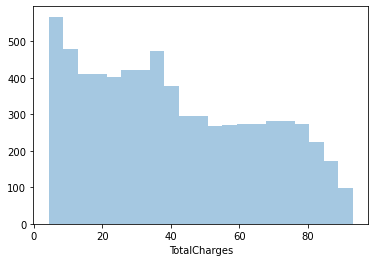

In [116]:
# Let's transform the variable 'TotalCharges' with the root-square function

data['TotalCharges'] = np.sqrt(data['TotalCharges'])

# Histogram of the variable 

sns.distplot(data['TotalCharges'], kde=False)

In [117]:
# We find again the skewness coefficient of the variable 'TotalCharges' after transformation

data['TotalCharges'].skew()

0.309149040238811

### Segmentation of the dataset

In [118]:
# Segmentation into explanatory variables and variables to be explained

X = data.drop('Churn', axis = 1)

y = data['Churn']

In [119]:
# breakdown into training and test data

seed=1111

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed, stratify = y)

Let's make sure that the proportions of people who have or have not terminated their contracts are the same in the different data sets

In [120]:
# Frequency of classes in y

pd.DataFrame(y).value_counts(normalize = True)

Churn
0        0.733544
1        0.266456
dtype: float64

In [121]:
# Frequency of classes in y_train

pd.DataFrame(y_train).value_counts(normalize = True)

Churn
0        0.733445
1        0.266555
dtype: float64

In [122]:
# Frequency of classes in y_test

pd.DataFrame(y_test).value_counts(normalize = True)

Churn
0        0.733692
1        0.266308
dtype: float64

#### Class imbalance in the category of the target variable ('churn')

Note that there is a very large difference between the number of observations in each category of the target variable to be predicted ('Churn'), which may lead to errors in future modelling.

Our case here shows that just over 73% of people have not cancelled their subscription (modality 0) compared to just over 26% who have cancelled their subscription (modality 1). There is therefore a large class imbalance. We can use resampling to create more balance between the categories of the target variable. 

We will use the sub-sampling method, which means reducing the observations of the majority class (modality 0) proportionally with the minority class (modality 1)

In [123]:
# Solving the Class Imbalance Problem: Majority Class Subsampling Method

X2 = X_train

X2['Churn'] = y_train.values

minority = X2[X2.Churn == 1]

majority = X2[X2.Churn == 0]

majority_downsampled = resample(majority, replace=False, n_samples = len(minority), random_state = seed)

downsampled = pd.concat([minority, majority_downsampled], axis=0)

downsampled

<ipython-input-123-4d9e9ae906f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Churn'] = y_train.values


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,tenure,Churn
964,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,45.70,6.760178,1,1
5258,0,0,0,0,1,1,0,1,1,0,...,1,1,0,0,0,0,104.70,84.972643,69,1
4631,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,1,0,92.50,21.276748,5,1
1751,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,1,0,89.95,34.327831,14,1
5215,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,20.15,12.500000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,0,0,0,0,1,1,0,0,0,0,...,1,0,1,1,0,0,81.80,67.338325,56,0
3984,1,0,1,1,1,0,0,1,0,1,...,0,0,1,0,0,0,25.10,43.102784,72,0
4816,1,0,1,1,1,1,0,1,0,0,...,0,1,0,1,0,0,75.00,64.914559,55,0
1278,0,0,1,1,0,0,1,0,0,0,...,1,1,0,1,0,0,60.70,47.271027,36,0


In [124]:
# Checking the sub-sampling carried out

downsampled['Churn'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Churn, dtype: float64

#### Review of training data

In [125]:
# We extract the training data after reprocessing by sub-sampling

X_train_down = downsampled.drop('Churn', axis=1)

y_train_down = downsampled['Churn']

In [126]:
# Definition of training data
# Possible choices : (X_train, y_train) et (X_train_down, y_train_down)

#dataframe of explanatory variables
train_features = X_train_down

#dataframe of the variable to be explained
train_labels = y_train_down

We have chosen the data from the sub-sampling as a basis.
Note that it is recommended to work all the cases and choose the best model afterwards. 

***This allows us to reset all the variables between 0 and 1 to allow a better training and thus reduce the bias that can be generated in our model.


#### Normalisation or Standardisation of data for explanatory variables 

In [127]:
# We will normalise instead of standardising the variables
 
# The majority of our variables are contained between 0 and 1 
#Normalization via the MinMaxScaler() method
#Standardisation via the StandardScaler() method

In [128]:
#Normalization of explanatory variable data

scaler = MinMaxScaler()
mod_scaler = scaler.fit(train_features)
train_features = mod_scaler.transform(train_features)
X_test = mod_scaler.transform(X_test)

# Retransformation of the data into Dataframe because the data is of type numpy

train_features = pd.DataFrame(train_features, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [129]:
# All our explanatory variable values are now between 0 and 1.

train_features.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,tenure
count,2230.000000,2230.0,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,...,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,0.496861,0.0,0.423767,0.265022,0.899552,0.640359,0.100448,0.433632,0.504036,0.166368,...,0.166368,0.405381,0.188341,0.170852,0.186547,0.413004,0.217040,0.490028,0.376004,0.376827
std,0.500102,0.0,0.494265,0.441444,0.300664,0.480003,0.300664,0.495687,0.500096,0.372494,...,0.372494,0.491076,0.391072,0.376464,0.389635,0.492484,0.412323,0.285879,0.270535,0.337097
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270854,0.138061,0.056338
50%,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.560440,0.329419,0.281690
75%,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.716284,0.585711,0.661972
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modelling via Logistic regression

We use logistic regression because of the interpretation of our variable to be explained which is either 0 or 1. 
It is therefore more logical to turn to the logistic regression method*** whose variable to be explained in this model obeys the logic ***True or False (0 or 1)***.

### Choice of the Metric to evaluate the performance of our model

There is the ***accuracy metric, the ***precision*** metric and the ***recall*** metric see -> Metric choices :
 https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

Improving *precision* decreases *recall* and vice versa.
Fortunately, there is a metric that contains both sensitivity and specificity. This is the F1 score.

* F1 score**: Harmonic mean of ***precision*** and ***recall***. It is therefore calculated by the formula : $$F1 score = 2 * \frac{precision * recall}{precision + recall}$$

For a perfect model, f1 score is equal to 1 and the worst performance is a model with an f1 score equal to O.

We choose the F1 score to evaluate the performance of each model that will be built.

### Selection of the best variables to predict the result


There are several ways to select the best predictors.
***Note that models based on the decision tree method have an attribute that gives the importance of each of the predictor variables. This allows us to select the best predictors of the outcome.

We will create a random forest model without looking for the best hyperparameters. From this model we will determine the most important variables that will be used to train the machine learning algorithm.

In [130]:
# Selection of the best predictors

# We will train the data without searching for the best hyperparameters

rf = RandomForestClassifier()

rf.fit(train_features, train_labels)

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2047
           1       0.50      0.78      0.61       743

    accuracy                           0.73      2790
   macro avg       0.70      0.75      0.70      2790
weighted avg       0.79      0.73      0.75      2790



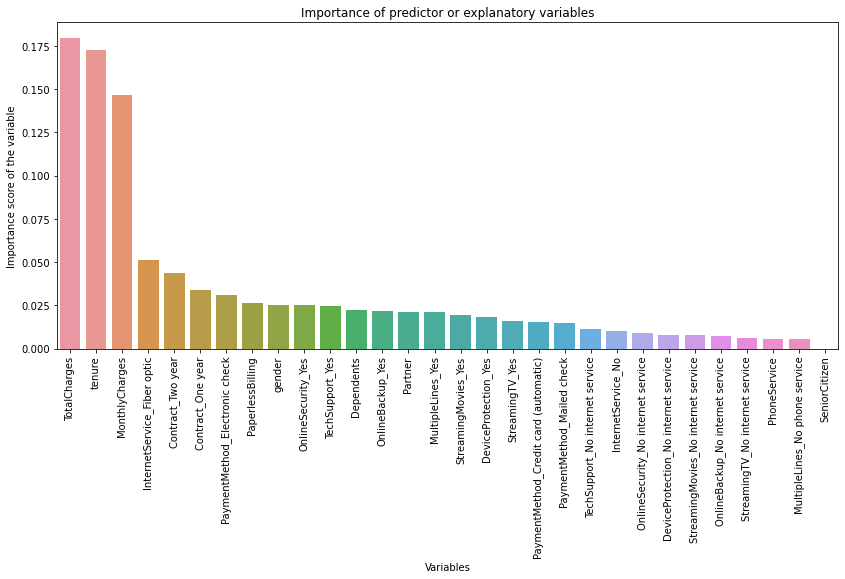

In [131]:
# Visualisation of important explanatory variables

plt.figure(figsize=(14, 6))

# the variables are stored in the variable 'features_importances_' (attribute giving the degree of importance of each predictor variable)
#selections of column names ("index")
#we sort from the largest value to the smallest one we do "sort_values(ascending =False)
vars_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending=False)

#Let's draw a bar chart 
#variable or column names are in row indices
#"X is the panda series object we just created
#"y are the oms of the columns that are in row index"
sns.barplot(x = vars_imp.index, y=vars_imp)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importance score of the variable")
plt.title("Importance of predictor or explanatory variables")
plt.show()

In [132]:
#Display of explanatory values in descending order

vars_imp

TotalCharges                             0.179698
tenure                                   0.172503
MonthlyCharges                           0.146536
InternetService_Fiber optic              0.050951
Contract_Two year                        0.043662
Contract_One year                        0.033760
PaymentMethod_Electronic check           0.031065
PaperlessBilling                         0.026627
gender                                   0.025364
OnlineSecurity_Yes                       0.025189
TechSupport_Yes                          0.024868
Dependents                               0.022075
OnlineBackup_Yes                         0.021469
Partner                                  0.021118
MultipleLines_Yes                        0.020891
StreamingMovies_Yes                      0.019217
DeviceProtection_Yes                     0.018172
StreamingTV_Yes                          0.016060
PaymentMethod_Credit card (automatic)    0.015477
PaymentMethod_Mailed check               0.014493


We will select the variables that best predict the model by defining a threshold.

***We note from the data of the important variables below 
that the majority of the variables are lower than 0.009 our threshold will be equal to 0.009, i.e. 1% of estimation error by the randomforets model***.

In [135]:
# Selections of variables for modelling

seuil= 0.01

#We select and transform into a list
vars_selected= vars_imp[vars_imp>seuil].index.to_list()

train_features=train_features[vars_selected]
X_test=X_test[vars_selected]

Visualisation of the number of new variables that will be definitively used for modelling. **** Let's note that we had 31 variables of which 30 were explanatory variables after transforming the categorical variables into quantitative variables. ****



In [136]:
# Number of final predictors

len(train_features.columns)
len(vars_selected)

22

We move to 22 explanatory variables

### Modelling proper

***Our objective is to develop a model to predict in advance which customers will unsubscribe.***
This will allow us to better retain customers so that they do not unsubscribe due to the reduced costs compared to the cost of acquiring new customers

##### Training of the model

In [139]:
# Dictionary of hyperparameters

#The hyperparameter settings allow the algorithm to learn instead of memorise, hence C.
#The stronger the 'C' the more it tends towards regularisation the more we have under-fitting 
#The weaker the 'C' the more it tends towards overfitting

param_grid = {'C':[0.001, 0.01, 1, 10, 40, 90, 150, 400]}


# GridSearchCV object

# 'f1' is the evaluation metric (we chose it at the beginning of the modelling)
# the default scoring is accurancy we chose f1-score 
#'cv' crossvalidation: refers to dividing the training dataset into 5 (4 parts for training and 1 part for testing) according to the 1000 iterations
# crossvalidation is an indispensable element allowing the machine to generalise

modele_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=1000), 
                                 param_grid=param_grid, 
                                 scoring='f1', 
                                 cv=5)

# Training of the algorithm

logreg_model = modele_logreg_class.fit(train_features, train_labels)

# Best score and best hyperparameter

#round allows rounding to 3 digits after the decimal point
print(round(logreg_model.best_score_, 3))

print(logreg_model.best_estimator_)

0.77
LogisticRegression(C=10, max_iter=1000, random_state=1111)


***The best score is equal to 0.77 for C = 10***.

#### Test of the model

In [140]:
#Model performance testing functions

def model_test(model, features, labels):
    pred=model.predict(features)
    print(classification_report(labels, pred))

In [141]:
#logistic model test

model_test(logreg_model, X_test,y_test)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2047
           1       0.50      0.80      0.62       743

    accuracy                           0.74      2790
   macro avg       0.71      0.76      0.71      2790
weighted avg       0.80      0.74      0.75      2790



We have thus a model tested on a dataset of which he has no knowledge and we can see that it allows to generalize with an Accuracy of 0.74 and the f1-score for the modality (0) = 0.80 thus tends towards 1 for the modality (1) it tends towards 1 by a rounding by excess.

Our logistic regression model thus allows us to have ***good overall accuracy*** as well as ***precision*** and ***good recall***.

However, we can test other models outside logistic regression in order to choose the best model.
